# Final Project: Santander Customer Satisfaction

## Name: Rafael Villalobos, David Truong, Martin Guadron

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The 'TARGET' column is the variable to predict. It equals 1 for unsatisfied and 0 for satisfied customers

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Training set shape: (76020, 371)
Test set shape: (75818, 370)

Data types in the training set:
ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

Basic statistics for the training set:
                  ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.0

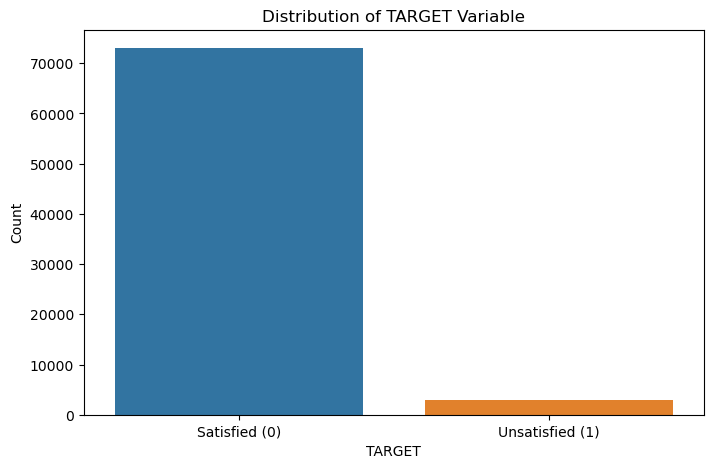

In [34]:
# Check the size of the datasets
print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

# Check the data types of each column
print("\nData types in the training set:")
print(train.dtypes)

# Basic statistics to understand the features
print("\nBasic statistics for the training set:")
print(train.describe())

# Check the distribution of TARGET variable
target_counts = train['TARGET'].value_counts()
print(target_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.title('Distribution of TARGET Variable')
plt.xticks([0, 1], ['Satisfied (0)', 'Unsatisfied (1)'])
plt.show()

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Fit the pipeline to your data
X = train.drop(columns='TARGET')
y = train['TARGET']

X_test_original = test

# Define the pipeline with preprocessing steps and a model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X, y)

y_test_predict = pipeline.predict(X_test_original)

predictions_df = pd.DataFrame({'Customer_ID': test.index, 'TARGET_Prediction': y_test_predict})

# Display the first few rows of predictions
predictions_df.head()

,Customer_ID,TARGET_Prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


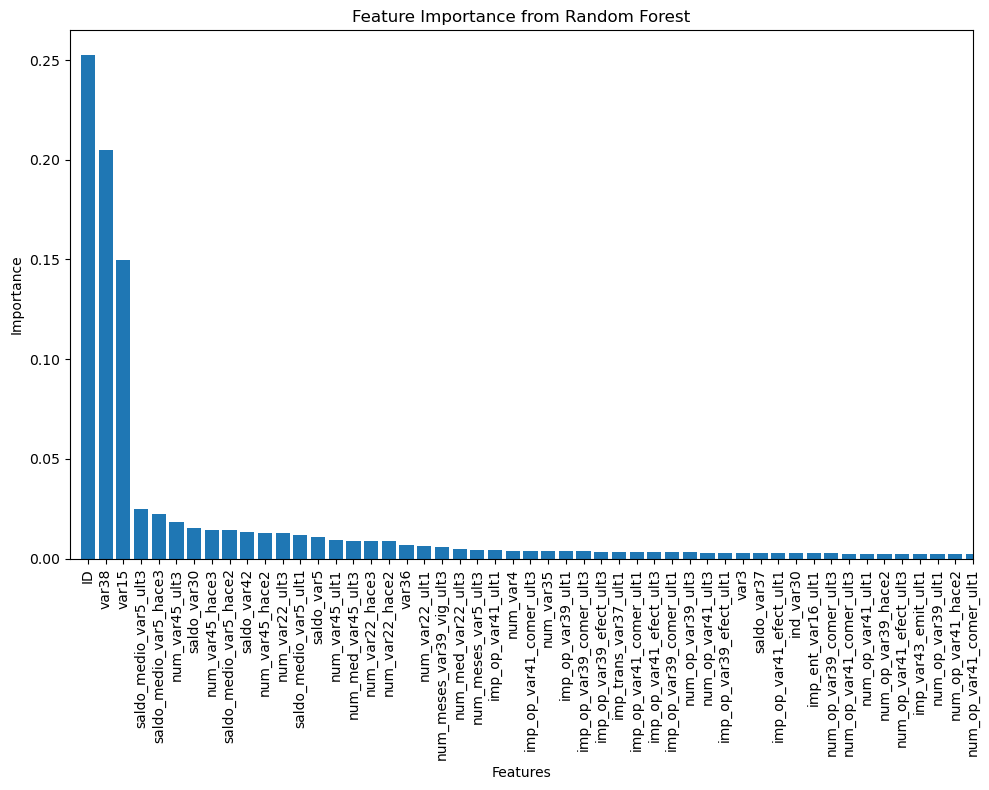

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the trained model
feature_importances = pipeline.named_steps['classifier'].feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 8))
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(len(features)), feature_importances[indices], align='center')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlim(-1, 50)  # Only show x values
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test), "\n")

print("Training set balance:")
print(y_train.value_counts(normalize = True))
print("Testing set balance:")
print(y_test.value_counts(normalize = True))

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

Training set size: 53214
Testing set size: 22806 

Training set balance:
TARGET
0    0.960424
1    0.039576
Name: proportion, dtype: float64
Testing set balance:
TARGET
0    0.960449
1    0.039551
Name: proportion, dtype: float64


In [ ]:
#!pip install tensorflow

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

/home/6b56ac9b-14c4-46c4-9ba0-f47f35066116/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9583 - loss: 0.1933 - val_accuracy: 0.9598 - val_loss: 0.1517
Epoch 2/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9605 - loss: 0.1532 - val_accuracy: 0.9598 - val_loss: 0.1498
Epoch 3/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9593 - loss: 0.1532 - val_accuracy: 0.9598 - val_loss: 0.1465
Epoch 4/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9608 - loss: 0.1472 - val_accuracy: 0.9598 - val_loss: 0.1479
Epoch 5/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9605 - loss: 0.1453 - val_accuracy: 0.9598 - val_loss: 0.1458
Epoch 6/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9609 - loss: 0.1427 - val_accuracy: 0.9598 - val_loss: 0.1450
Epoch 7/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9600 - loss: 0.1433 - val_accuracy: 0.9598 - val_loss: 0.1442
Epoch 8/10
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9616 - loss: 0.1416 - 

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_mat)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step
Accuracy: 0.9604490046478997
Precision: 0.5
Recall: 0.0033259423503325942
F1-score: 0.006607929515418502
Confusion Matrix:
 [[21901     3]
 [  899     3]]
